In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy
plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['lines.markeredgewidth']=2
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
tokamaker_python_path = os.getenv('OFT_ROOTPATH')
if tokamaker_python_path is not None:
    sys.path.append(os.path.join(tokamaker_python_path,'python'))
from OpenFUSIONToolkit.TokaMaker.meshing import gs_Domain, save_gs_mesh

In [3]:
import json
with open('../nsf_geom_new.json','r') as fid:
    nsf_geom = json.load(fid)

ind_div_u_1 = 16
ind_div_u_2 = 68


ind_in_1 = 24
ind_in_2 = 38

ind_div_l_1 = 45
ind_div_l_2 = 97

ind_out_1 = 26
ind_out_2 = 53
limiter = 1.E-3*np.concatenate((np.array(nsf_geom['div_upper'])[ind_div_u_1:ind_div_u_2,:], np.array(nsf_geom['wall_inboard'])[ind_in_1:ind_in_2,:], np.array(nsf_geom['div_lower'])[ind_div_l_1:ind_div_l_2,:], np.array(nsf_geom['wall_outboard'])[ind_out_1:ind_out_2,:]))

In [4]:
coils = scipy.io.loadmat('../coils.mat')
print(coils['coils'])

coils = {
    'CS_1':{'r': 0.58, 'z': 0.615, 'dr': 0.075,'dz': 0.43},
    'CS_2':{'r': 0.58, 'z': 0.0, 'dr': 0.075,'dz': 0.8},
    'CS_3':{'r': 0.58, 'z': -0.615, 'dr': 0.075,'dz': 0.43},

    'PF_1U':{'r': 0.738, 'z': 0.6, 'dr': 0.125,'dz': 0.125}, 
    'PF_2U':{'r': 1.2, 'z': 0.75, 'dr': 0.175,'dz': 0.175}, 
    'PF_3U':{'r': 1.4, 'z': 0.6, 'dr': 0.15,'dz': 0.15},
    'PF_4U':{'r': 1.95, 'z': 0.3, 'dr': 0.175,'dz': 0.175},

    'PF_1L':{'r': 0.738, 'z': -0.6, 'dr': 0.125,'dz': 0.125},
    'PF_2L':{'r': 1.2, 'z': -0.75, 'dr': 0.175,'dz': 0.175}, 
    'PF_3L':{'r': 1.4, 'z': -0.6, 'dr': 0.15,'dz': 0.15},
    'PF_4L':{'r': 1.95, 'z': -0.3, 'dr': 0.175,'dz': 0.175}
}

[[(array([[0.58 , 0.58 , 0.58 , 0.738, 1.2  , 1.4  , 1.95 , 1.95 , 1.4  ,
          1.2  , 0.738, 0.787, 0.787, 1.287, 1.287]]), array([[ 0.615,  0.   , -0.615,  0.6  ,  0.75 ,  0.6  ,  0.3  , -0.3  ,
          -0.6  , -0.75 , -0.6  ,  0.3  , -0.3  ,  0.225, -0.225]]), array([[0.075, 0.075, 0.075, 0.125, 0.175, 0.15 , 0.175, 0.175, 0.15 ,
          0.175, 0.125, 0.01 , 0.01 , 0.007, 0.007]]), array([[0.43 , 0.8  , 0.43 , 0.125, 0.175, 0.15 , 0.175, 0.175, 0.15 ,
          0.175, 0.125, 0.1  , 0.1  , 0.05 , 0.05 ]]), array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
           0.5, -0.5,  0.5, -0.5]]), array([[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2]], dtype=uint8), array([[5, 8, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]], dtype=uint8), array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 12, 13, 13]],
        dtype=uint8), array([[1.5708  , 1.5708  , 1.5708  , 1.5708  , 1.5708  , 1.5708  ,
          1.5708  , 1.5708  , 1.5708  , 1.5708  , 1.5708  , 1.01229 ,

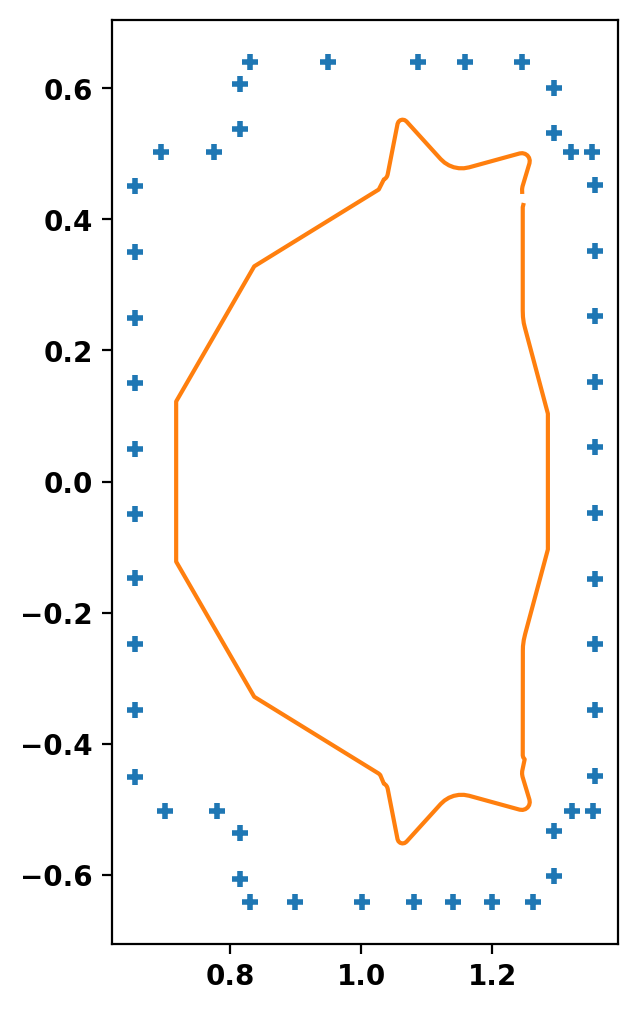

In [5]:
vessels = scipy.io.loadmat('../vessels.mat')
vessel_key = 'vessel_new'
vessel_key = 'vessel_old_thin'
# vessel_key = 'vessel_old_wide'
vessel_R = vessels[vessel_key][0][0][0].flatten()
vessel_Z = vessels[vessel_key][0][0][1].flatten()
vessel_dR = vessels[vessel_key][0][0][2].flatten()
vessel_dZ = vessels[vessel_key][0][0][3].flatten()
vessel_theta = vessels[vessel_key][0][0][8].flatten()
vessel_Res = vessels[vessel_key][0][0][10].flatten()
# print(vessels[key][0][0][2])
# print(vessels[key][0][0][3])
# print(vessels[key][0][0][8])
# print(vessels[key][0][0][9])
# print(vessels[key][0][0][10])
fig, ax = plt.subplots(1,1)
ax.plot(vessel_R,vessel_Z,'+')
ax.plot(limiter[:,0],limiter[:,1])
# print(scipy.io.loadmat('vessels.mat')['vessel_new'])
# print(scipy.io.loadmat('vessels.mat')['vessel_old_thin'])
# print(scipy.io.loadmat('vessels.mat')['vessel_old_wide'])
ax.set_aspect('equal','box')

In [6]:
plasma_dx = 0.02
coil_dx = 0.04
vv_dx = 0.01
vac_dx = 0.075

# Create a G-S domain
gs_mesh = gs_Domain()
#gs_mesh = gs_Domain(zpad=[1.5,1.5])
# Define region information for mesh
gs_mesh.define_region('air',vac_dx,'boundary')                     # Define the bounding region
gs_mesh.define_region('plasma',plasma_dx,'plasma')                 # Define the plasma region and resolution

# Define each of the PF coils
gs_mesh.define_region('CS_1',coil_dx,'coil')
gs_mesh.define_region('CS_2',coil_dx,'coil')
gs_mesh.define_region('CS_3',coil_dx,'coil')
gs_mesh.define_region('PF_1U',coil_dx,'coil')
gs_mesh.define_region('PF_1L',coil_dx,'coil')
gs_mesh.define_region('PF_2U',coil_dx,'coil')
gs_mesh.define_region('PF_2L',coil_dx,'coil')
gs_mesh.define_region('PF_3U',coil_dx,'coil')
gs_mesh.define_region('PF_3L',coil_dx,'coil')
gs_mesh.define_region('PF_4U',coil_dx,'coil')
gs_mesh.define_region('PF_4L',coil_dx,'coil')
gs_mesh.define_region('DIV_1U',coil_dx,'coil')
gs_mesh.define_region('DIV_1L',coil_dx,'coil')
gs_mesh.define_region('DIV_2U',coil_dx,'coil')
gs_mesh.define_region('DIV_2L',coil_dx,'coil')

# gs_mesh.define_region('in_lower_plate',vv_dx/2,'conductor',eta=3.8E-8)
# gs_mesh.define_region('out_lower_plate',vv_dx/2,'conductor',eta=3.8E-8)
# gs_mesh.define_region('in_upper_plate',vv_dx/2,'conductor',eta=3.8E-8)
# gs_mesh.define_region('out_upper_plate',vv_dx/2,'conductor',eta=3.8E-8)

for i in range(vessel_R.shape[0]):
    gs_mesh.define_region('VV_{0}'.format(i+1),coil_dx,'conductor',eta=vessel_Res[i]*vessel_dR[i]*vessel_dZ[i])
    # plt.plot(tcam_locs[:,0]*1000,tcam_locs[:,1]*1000,'r+')


In [7]:
# Define geometry
gs_mesh.add_polygon(limiter,'plasma',parent_name='air')  # Define the shape of the limiter
# gs_mesh.add_polygon(limiter/1000,'plasma',parent_name='vacuum')  # Define the shape of the limiter
# gs_mesh.add_annulus(vv_inner/1000, 'vacuum', vv_outer/1000, 'vv', parent_name = 'air')

# Define each of the PF coils
for key, val in coils.items():
    gs_mesh.add_rectangle(val['r'],val['z'],val['dr'],val['dz'],key,parent_name = 'air')


gs_mesh.add_polygon(np.array(nsf_geom['DIV1L'])/1000, 'DIV_1L',parent_name = 'air')
gs_mesh.add_polygon(np.array(nsf_geom['DIV1U'])/1000, 'DIV_1U',parent_name = 'air')
gs_mesh.add_polygon(np.array(nsf_geom['DIV2L'])/1000, 'DIV_2L',parent_name = 'air')
gs_mesh.add_polygon(np.array(nsf_geom['DIV2U'])/1000,'DIV_2U',parent_name = 'air')

# gs_mesh.add_polygon(np.array(nsf_geom['in_lower_plate'])/1000,'in_lower_plate',parent_name='air')
# gs_mesh.add_polygon(np.array(nsf_geom['out_lower_plate'])/1000,'out_lower_plate',parent_name='air')
# gs_mesh.add_polygon(np.array(nsf_geom['in_upper_plate'])/1000,'in_upper_plate',parent_name='air')
# gs_mesh.add_polygon(np.array(nsf_geom['out_upper_plate'])/1000,'out_upper_plate',parent_name='air')

for i in range(vessel_R.shape[0]):
    print(vessel_Res[i]*vessel_dR[i]*vessel_dZ[i])
    gs_mesh.add_rectangle(vessel_R[i],vessel_Z[i],vessel_dR[i]*0.8,vessel_dZ[i],'VV_{0}'.format(i+1),
                          parent_name = 'air',rot=(vessel_theta[i]-np.pi/2.0)*180.0/np.pi)
    # plt.plot(tcam_locs[:,0]*1000,tcam_locs[:,1]*1000,'r+')


3.086612175e-06
3.086612175e-06
3.086612175e-06
3.086612175e-06
3.0866121750000005e-06
3.275107574999999e-06
3.652098375e-06
3.840593774999999e-06
3.840593774999999e-06
3.915049457999999e-06
4.471110887999999e-06
5.1171788715e-06
5.458826784e-06
5.867390563500001e-06
6.098768667000001e-06
6.098768667000001e-06
6.2165782919999995e-06
1.4229777739655173e-06
6.389994060000001e-06
6.389994060000001e-06
6.389994060000001e-06
6.389994060000001e-06
6.389994060000001e-06
6.389994060000001e-06
6.389994060000001e-06
6.389994060000001e-06
6.389994060000001e-06
6.389994060000001e-06
1.515188857e-06
6.225531823499999e-06
6.098768667000001e-06
6.098768667000001e-06
5.945616154499999e-06
5.6510920920000005e-06
5.368348992e-06
5.0898470385e-06
4.716626146499999e-06
4.235491638e-06
3.915049457999999e-06
3.840593774999999e-06
3.840593774999999e-06
3.6756603e-06
3.2986695e-06
3.086612175e-06
3.086612175e-06
3.086612175e-06
3.0000000000000005e-06
2.9309999999999996e-06


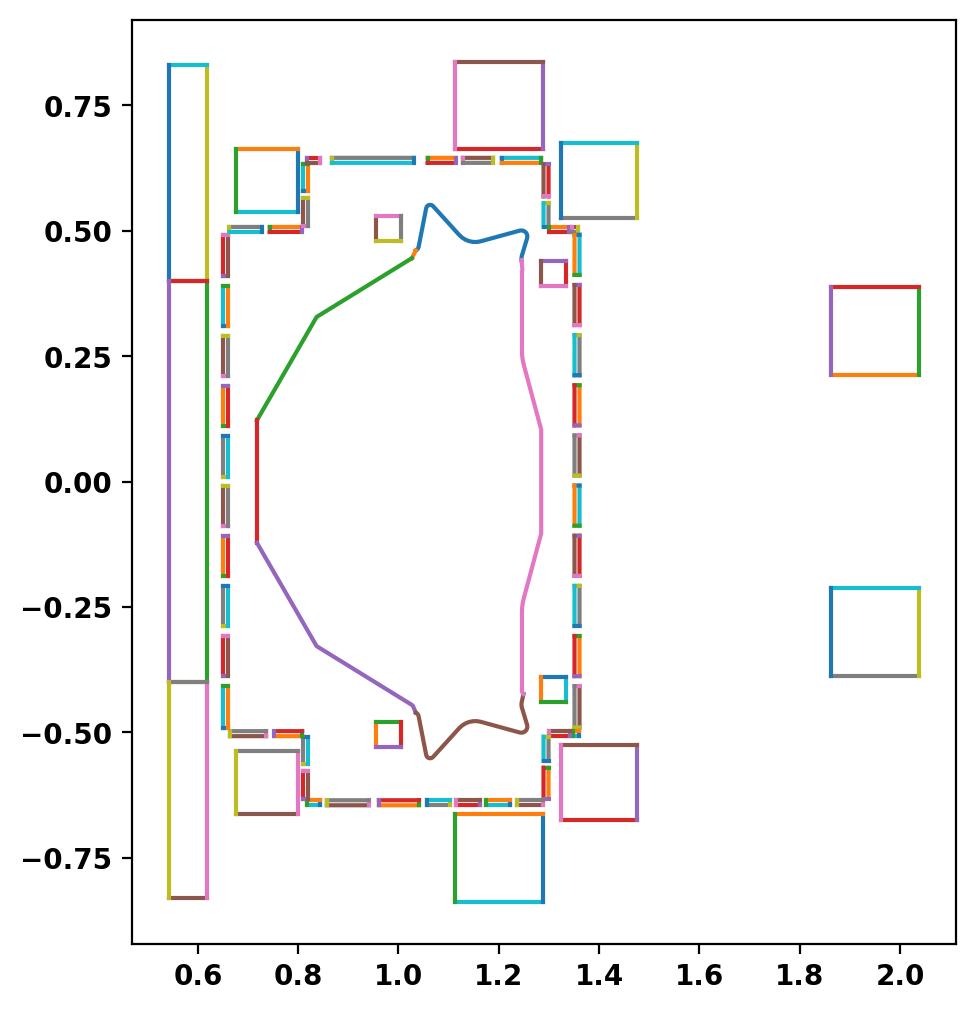

In [8]:
fig, ax = plt.subplots(1,1)
for region in gs_mesh.regions:
    region.plot_segments(fig,ax)
ax.set_aspect('equal','box')

In [9]:
mesh_pts, mesh_lc, mesh_reg = gs_mesh.build_mesh()
coil_dict = gs_mesh.get_coils()
cond_dict = gs_mesh.get_conductors()

Assembling regions:
  # of unique points    = 705
  # of unique segments  = 261
Generating mesh:
  # of points  = 3843
  # of cells   = 7568
  # of regions = 65


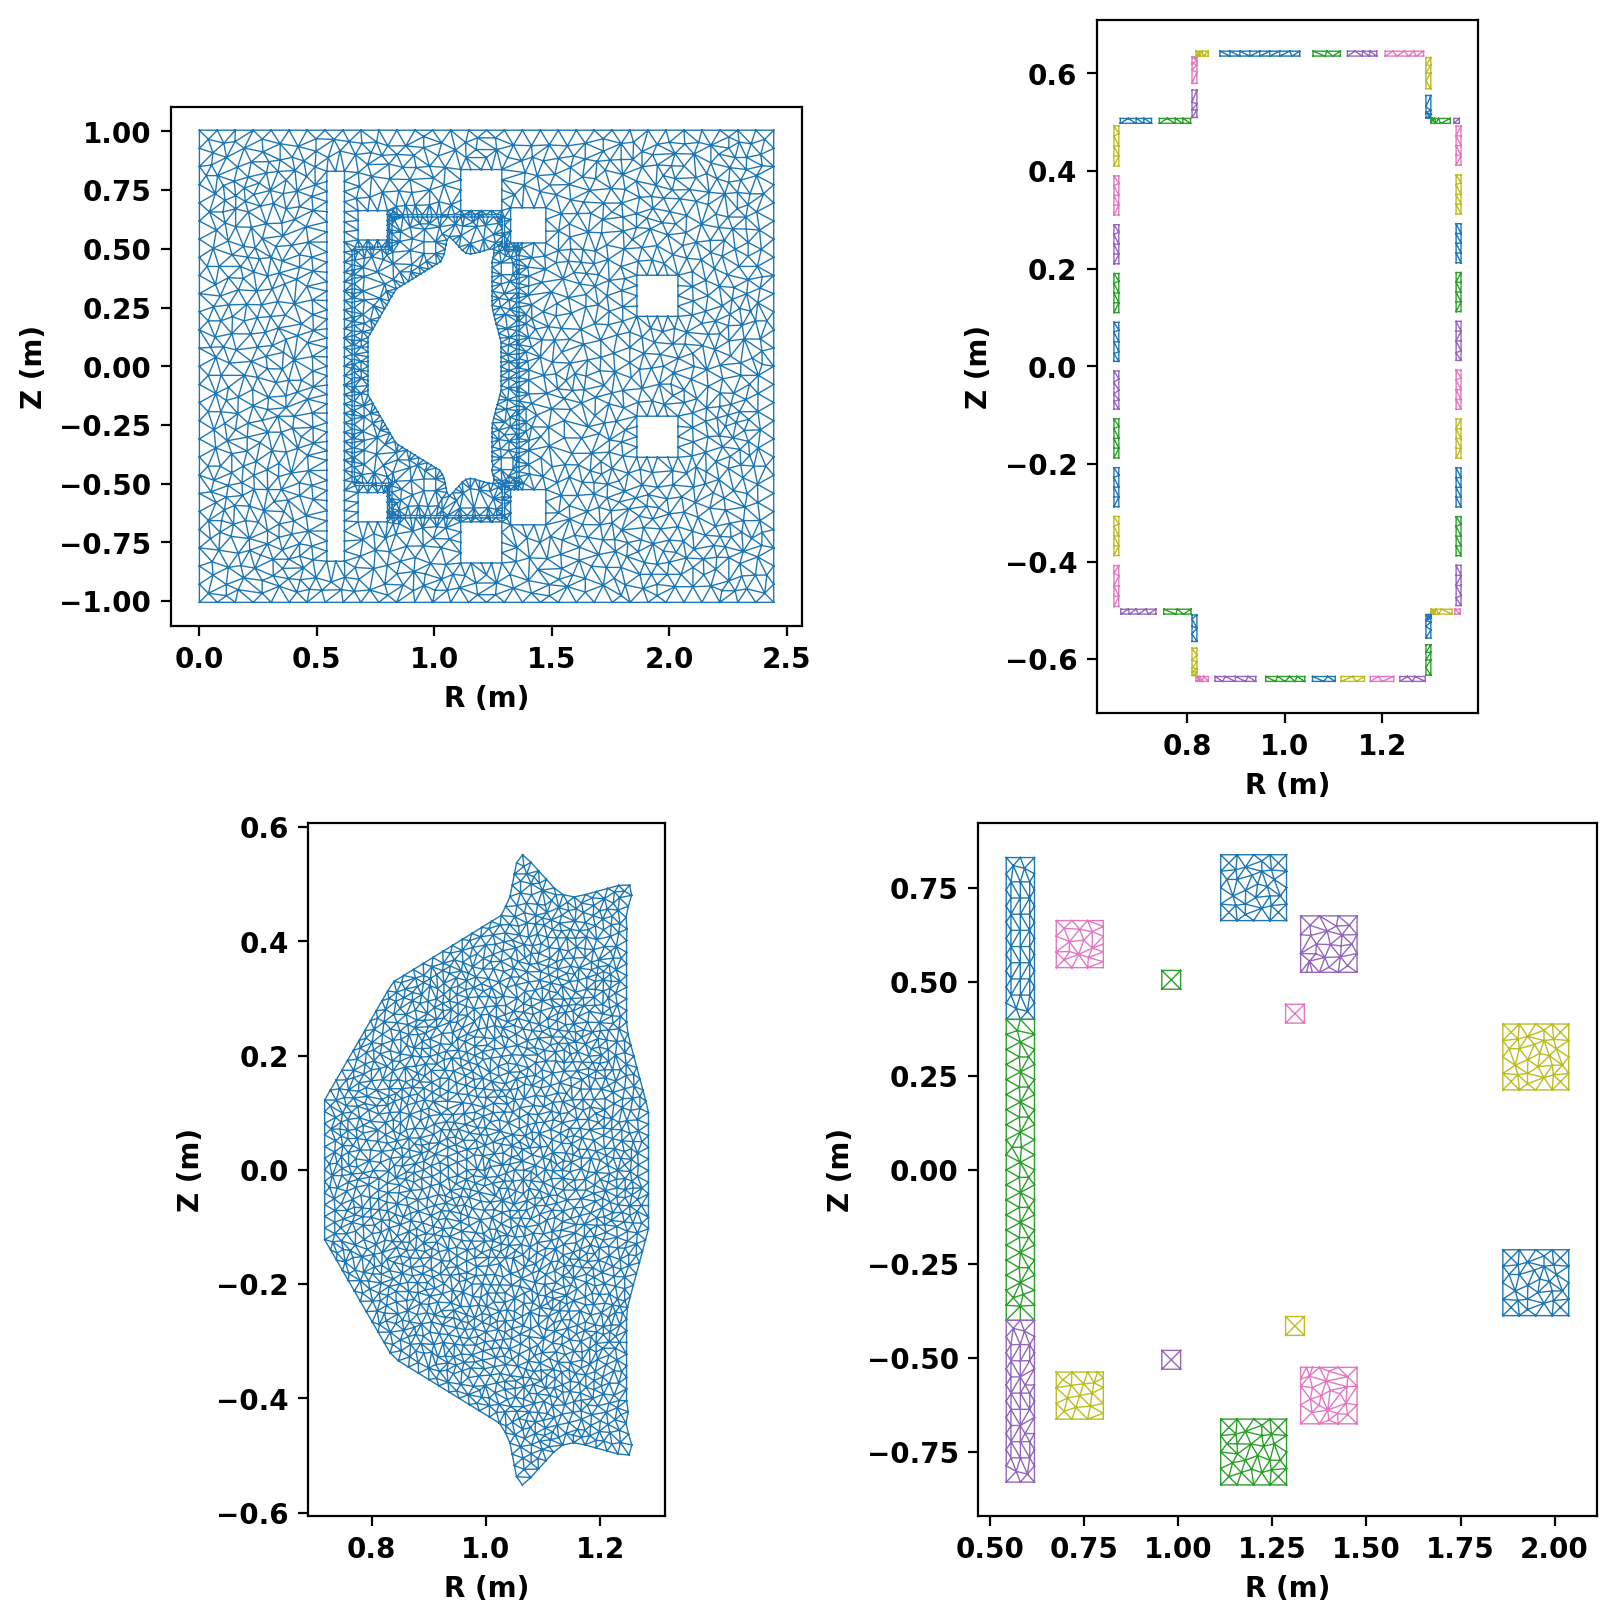

In [10]:
fig, ax = plt.subplots(2,2,figsize=(8,8),constrained_layout=True)
gs_mesh.plot_mesh(fig,ax,show_legends=False)

In [11]:
save_gs_mesh(mesh_pts,mesh_lc,mesh_reg,coil_dict,cond_dict,'nextstep_mesh-{0}.h5'.format(vessel_key))